In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from itertools import cycle
from math import pi
from pytimeparse.timeparse import timeparse
import ast

%config Completer.use_jedi = False


In [2]:
# read data

folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "experiment_results"
result_file = "results-new-graph.csv"


filepath = os.path.join(folder_name, f"{dataset_path}/{result_file}")
dataframe = pd.read_csv(filepath)
dataframe



,approach,data_path,algorithm,depth,accuracy,join_time,train_time,total_time,feature_importances,fs_time,dataset
0,arda,other-data/decision-trees-split/titanic,CART,1.0,0.789981,0.074642,0.068548,5.859683,{'Sex': 1.0},5.716493,titanic
1,arda,other-data/decision-trees-split/titanic,ID3,2.0,0.614719,0.074642,0.237929,6.029064,{},5.716493,titanic
2,arda,other-data/decision-trees-split/titanic,XGBoost,1.0,0.789981,0.074642,0.294243,6.085378,{'Sex': 1.0},5.716493,titanic
3,join_all,other-data/decision-trees-split/titanic,CART,4.0,0.772655,0.064785,0.072502,0.137287,"{'Name': 0.021, 'Nametitanic/passenger_info.cs...",NaN,titanic
4,join_all,other-data/decision-trees-split/titanic,ID3,2.0,0.385281,0.064785,191.393844,191.458629,{},NaN,titanic
5,join_all,other-data/decision-trees-split/titanic,XGBoost,2.0,0.745259,0.064785,0.651825,0.716610,"{'Name': 0.028, 'Sex': 0.47, 'Age': 0.036, 'Si...",NaN,titanic
6,join_all_ffs,other-data/decision-trees-split/titanic,CART,2.0,0.801196,0.059003,0.027014,1.156562,"{'Name': 0.905, 'Nametitanic/passenger_info.cs...",1.070545,titanic
7,join_all_ffs,other-data/decision-trees-split/titanic,XGBoost,4.0,0.826768,0.059003,0.652669,14.122271,"{'Name': 0.663, 'Nametitanic/passenger_info.cs...",13.410599,titanic
8,all-in-path,titanic/titanic.csv/PassengerId--titanic/passe...,CART,5.0,0.809238,0.513113,0.070091,0.583204,"{'Name': 0.012, 'TicketId': 0.083, 'Sex': 0.56...",NaN,titanic
9,all-in-path,titanic/titanic.csv/PassengerId--titanic/passe...,ID3,2.0,0.383783,0.513113,184.839730,185.352843,{},NaN,titanic


In [3]:
# get original (base) table name from dataset name 

def shorten_dataset_name_join(data):
    if 'other-data' in data:
        partition = data.partition('other-data')[2]
        split = partition.split('/')[-1]
    else:
        split = data.split('/')[0]
    return split

def half_time(data):
    if 'other-data' in data:
        partition = data.partition('other-data')[2]
        split = partition.split('/')[-1]
    else:
        split = data.split('/')[0]
    return split

dataframe['dataset'] = dataframe['data_path'].apply(lambda x: shorten_dataset_name_join(x))

dataframe


,approach,data_path,algorithm,depth,accuracy,join_time,train_time,total_time,feature_importances,fs_time,dataset
0,all-in-path,football/football.csv/id--football/differences...,CART,2.0,0.798761,2.075651,0.081938,2.157589,{'strong_score': 1.0},NaN,football
1,all-in-path,football/football.csv/id--football/differences...,ID3,2.0,0.519043,2.075651,269.792025,271.867676,{},NaN,football
2,all-in-path,football/football.csv/id--football/differences...,XGBoost,1.0,0.784404,2.075651,0.772123,2.847774,"{'date': 0.033, 'weak_team': 0.018, 'dif_overa...",NaN,football
3,best-ranked,football/football.csv/id--football/differences...,CART,4.0,0.785202,2.075651,0.087464,2.163115,"{'date': 0.022, 'dif_midfield': 0.016, 'id': 0...",NaN,football
4,best-ranked,football/football.csv/id--football/differences...,ID3,4.0,0.528358,2.075651,173.252891,175.328542,{},NaN,football
...,...,...,...,...,...,...,...,...,...,...,...
103,non-aug,other-data/decision-trees-split/titanic,ID3,2.0,0.383783,NaN,28.246128,28.246128,{},NaN,titanic
104,non-aug,other-data/decision-trees-split/titanic,XGBoost,1.0,0.562484,NaN,0.140772,0.140772,"{'PassengerId': 0.491, 'TicketId': 0.509}",NaN,titanic
105,non-aug,other-data/data/WebKP 2,CART,1.0,0.470925,NaN,0.012028,0.012028,{'webpage_id': 1.0},NaN,WebKP 2
106,non-aug,other-data/data/WebKP 2,ID3,2.0,0.091131,NaN,13.375112,13.375112,{},NaN,WebKP 2


In [4]:
df1 = dataframe[(dataframe['approach']=='best-ranked') | (dataframe['approach']=='all-in-path')]

df1['join_time'] = dataframe.apply(lambda x: x['join_time']/2, axis=1)
df1['total_time'] = dataframe.apply(lambda x: x['total_time']/2, axis=1)
df1['train_time'] = dataframe.apply(lambda x: x['train_time']/2, axis=1)

df2 = dataframe[(dataframe['approach']!='best-ranked')  & (dataframe['approach']!='all-in-path')]

df = pd.concat([df1, df2])
df['approach'].unique()


/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_36572/3298512316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['join_time'] = dataframe.apply(lambda x: x['join_time']/2, axis=1)
/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_36572/3298512316.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_time'] = dataframe.apply(lambda x: x['total_time']/2, axis=1)
/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_36572/3298512316.py:5: SettingWithCopyWarning: 
A val

array(['all-in-path', 'best-ranked', 'join_all', 'arda', 'join_all_ffs',
       'non-aug'], dtype=object)

In [3]:
# get global variables 

algs = dataframe['algorithm'].unique()
print(algs)

tables = dataframe['dataset'].unique()
print(tables)

approach = dataframe['approach'].unique()
print(approach)


['CART' 'ID3' 'XGBoost']
['titanic' 'football' 'steel-plate-fault']
['arda' 'join_all' 'join_all_ffs' 'all-in-path' 'best-ranked' 'non-aug']


In [4]:
best_ranked = dataframe[dataframe['approach']=='best-ranked']
# display(best_ranked)

all_path = dataframe[dataframe['approach']=='all-in-path']
# display(all_path)

join_all = dataframe[dataframe['approach']=='join_all']
# display(join_all)

arda = dataframe[dataframe['approach']=='arda']
# display(best_ranked)

join_all_ffs = dataframe[dataframe['approach']=='join_all_ffs']
# display(all_path)

non_aug = dataframe[dataframe['approach']=='non-aug']
# display(join_all)


best_ranked_df = best_ranked.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='accuracy').reset_index()
display(best_ranked_df)


,dataset,algorithm,depth,approach,accuracy
0,football,CART,2.0,best-ranked,6.190797
1,football,ID3,4.0,best-ranked,170.645855
2,football,XGBoost,1.0,best-ranked,6.553480
3,steel-plate-fault,CART,9.0,best-ranked,85.162665
4,steel-plate-fault,ID3,4.0,best-ranked,509.314594
5,steel-plate-fault,XGBoost,11.0,best-ranked,89.028154
6,titanic,CART,3.0,best-ranked,0.588195
7,titanic,ID3,2.0,best-ranked,169.759674
8,titanic,XGBoost,1.0,best-ranked,0.890371


In [5]:
# accuracy 
accuracy = None
for approach in dataframe['approach'].unique():
    dff = dataframe[dataframe['approach']==approach]
    dff = dff.groupby(['dataset', 'algorithm', 'depth', 'approach'])['accuracy'].max().to_frame(name='accuracy').reset_index()
    if accuracy is None:
        accuracy = dff
    else:
        accuracy = pd.concat([accuracy, dff])
        
display(accuracy)
    

,dataset,algorithm,depth,approach,accuracy
0,football,CART,6.0,arda,0.999479
1,football,ID3,4.0,arda,0.998958
2,football,XGBoost,2.0,arda,0.998437
3,steel-plate-fault,CART,4.0,arda,0.929155
4,steel-plate-fault,ID3,8.0,arda,0.855102
5,steel-plate-fault,XGBoost,1.0,arda,0.929155
6,titanic,CART,1.0,arda,0.789981
7,titanic,ID3,2.0,arda,0.614719
8,titanic,XGBoost,1.0,arda,0.789981
0,football,CART,10.0,join_all,0.995820


In [6]:
# train time
df = dataframe
train_time = None
for approach in df['approach'].unique():
    dff = df[df['approach']==approach]
    dff = dff.groupby(['dataset', 'algorithm', 'depth', 'approach'])['train_time'].max().to_frame(name='train_time').reset_index()
    if train_time is None:
        train_time = dff
    else:
        train_time = pd.concat([train_time, dff])
        
display(train_time)
    

,dataset,algorithm,depth,approach,train_time
0,football,CART,6.0,arda,0.065751
1,football,ID3,4.0,arda,40.282600
2,football,XGBoost,2.0,arda,0.605043
3,steel-plate-fault,CART,4.0,arda,0.060127
4,steel-plate-fault,ID3,8.0,arda,1.338951
5,steel-plate-fault,XGBoost,1.0,arda,0.487338
6,titanic,CART,1.0,arda,0.068548
7,titanic,ID3,2.0,arda,0.237929
8,titanic,XGBoost,1.0,arda,0.294243
0,football,CART,10.0,join_all,0.153988


In [7]:
# train time
total_time = None
for approach in df['approach'].unique():
    dff = df[df['approach']==approach]
    dff = dff.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='total_time').reset_index()
    if total_time is None:
        total_time = dff
    else:
        total_time = pd.concat([total_time, dff])
        
display(total_time)

,dataset,algorithm,depth,approach,total_time
0,football,CART,6.0,arda,31.876689
1,football,ID3,4.0,arda,72.093538
2,football,XGBoost,2.0,arda,32.415981
3,steel-plate-fault,CART,4.0,arda,217.050151
4,steel-plate-fault,ID3,8.0,arda,218.328975
5,steel-plate-fault,XGBoost,1.0,arda,217.477362
6,titanic,CART,1.0,arda,5.859683
7,titanic,ID3,2.0,arda,6.029064
8,titanic,XGBoost,1.0,arda,6.085378
0,football,CART,10.0,join_all,0.408521


In [8]:
depth = None
for approach in dataframe['approach'].unique():
    dff = dataframe[dataframe['approach']==approach]
    dff = dff.groupby(['dataset', 'algorithm', 'approach'])['depth'].max().to_frame(name='depth').reset_index()
    if depth is None:
        depth = dff
    else:
        depth = pd.concat([depth, dff])

In [9]:
join_time = None
for approach in df['approach'].unique():
    dff = df[df['approach']==approach]
    dff = df[(df['dataset']!='PubMed_Diabetes') & (df['dataset']!='CiteSeer') & (df['dataset']!='CORA')]
    dff = dff.groupby(['dataset', 'algorithm', 'depth', 'approach'])['join_time'].max().to_frame(name='join_time').reset_index()
    if join_time is None:
        join_time = dff
    else:
        join_time = pd.concat([join_time, dff])

In [10]:
# Separate into 2 datasets
small_datasets = ['football', 'steel-plate-fault', 'titanic']
big_datasets = ['CORA', 'WebKP 2', 'CiteSeer']

,dataset,algorithm,depth,approach,accuracy
8,titanic,XGBoost,1.0,best-ranked,0.607391
5,steel-plate-fault,XGBoost,11.0,best-ranked,0.603608
2,football,XGBoost,1.0,best-ranked,0.775118
0,football,CART,2.0,best-ranked,0.798761
3,steel-plate-fault,CART,9.0,best-ranked,0.587113


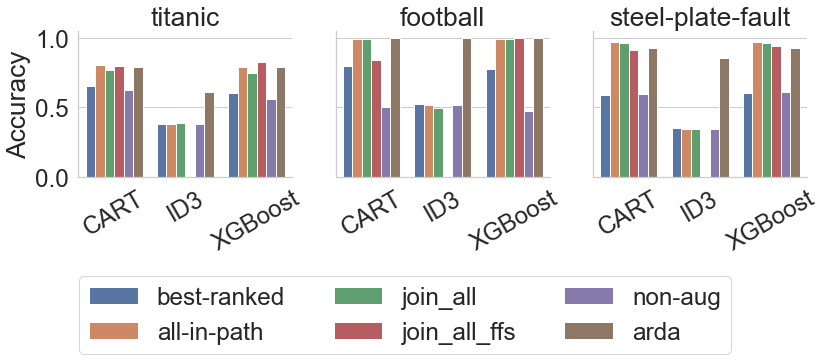

In [12]:
# Accuracy of BestRank, JoinAll and Non-Aug

# SMALL DATASETS

display(accuracy.head())

label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2, 'join_all_ffs': 3, 'non-aug': 4, 'arda': 5}

accuracy.sort_values(by=['algorithm'], ascending=True, inplace=True)
accuracy.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)

accuracy_filtered = accuracy[accuracy["dataset"].isin(small_datasets)]


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="accuracy", hue="approach", col="dataset", data=accuracy_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Accuracy')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/accuracy-all-small.png', dpi=300, bbox_inches="tight")




,dataset,algorithm,depth,approach,accuracy
3,CiteSeer,CART,2.0,best-ranked,0.230067
13,football,ID3,4.0,best-ranked,0.528358
16,steel-plate-fault,ID3,4.0,best-ranked,0.355155
4,CiteSeer,ID3,2.0,best-ranked,0.201704
19,titanic,ID3,2.0,best-ranked,0.383783


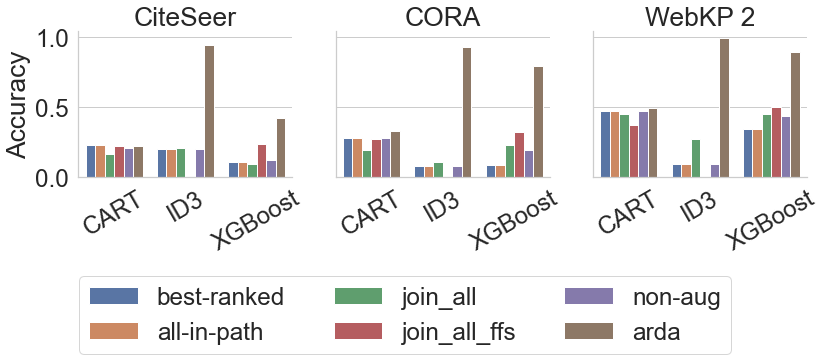

In [16]:
# Accuracy of BestRank, JoinAll and Non-Aug

# BIG DATASETS

display(accuracy.head())

label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2, 'join_all_ffs': 3, 'non-aug': 4, 'arda': 5}

accuracy.sort_values(by=['algorithm'], ascending=True, inplace=True)
accuracy.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)

accuracy_filtered = accuracy[accuracy["dataset"].isin(big_datasets)]
# accuracy_filtered = accuracy_filtered[accuracy_filtered["approach"] != "arda"]


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="accuracy", hue="approach", col="dataset", data=accuracy_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Accuracy')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/accuracy-all-big.pdf', dpi=300, bbox_inches="tight")




,dataset,algorithm,depth,approach,total_time
0,football,CART,2.0,best-ranked,6.190797
1,football,ID3,4.0,best-ranked,170.645855
2,football,XGBoost,1.0,best-ranked,6.553480
3,steel-plate-fault,CART,9.0,best-ranked,85.162665
4,steel-plate-fault,ID3,4.0,best-ranked,509.314594


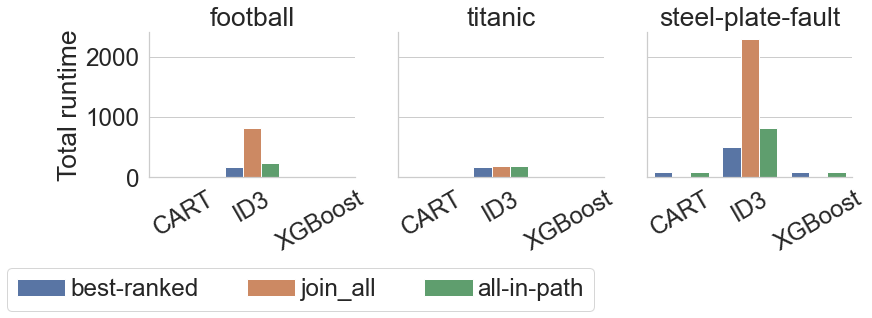

In [16]:
# Accuracy of BestRank, JoinAll and Non-Aug

best_ranked = df[df['approach']=='best-ranked']
# display(best_ranked)

all_path = df[df['approach']=='all-in-path']
# display(all_path)

join_all = df[df['approach']=='join_all']
# display(join_all)

best_ranked_df = best_ranked.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='total_time').reset_index()

all_path_df = all_path.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='total_time').reset_index()

join_all_df = join_all.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='total_time').reset_index()

concat_df = pd.concat([best_ranked_df, all_path_df, join_all_df])

display(concat_df.head())

# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

concat_df.sort_values(by=['algorithm'], ascending=True, inplace=True)
# concat_df.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="total_time", hue="approach", col="dataset", data=concat_df, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Total runtime')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(-0.2, -1), loc=4, ncol=3, handletextpad=0.2)

g.savefig('plots/runtime-all.pdf', dpi=300, bbox_inches="tight")





,dataset,algorithm,depth,approach,join_time
0,football,CART,1.0,non-aug,NaN
18,steel-plate-fault,CART,6.0,all-in-path,85.046816
19,steel-plate-fault,CART,6.0,join_all,0.186446
20,steel-plate-fault,CART,6.0,non-aug,NaN
21,steel-plate-fault,CART,9.0,best-ranked,85.046816
...,...,...,...,...,...
49,titanic,XGBoost,2.0,join_all,0.064785
11,football,XGBoost,1.0,all-in-path,6.125426
12,football,XGBoost,1.0,best-ranked,6.125426
45,titanic,XGBoost,1.0,all-in-path,0.513113


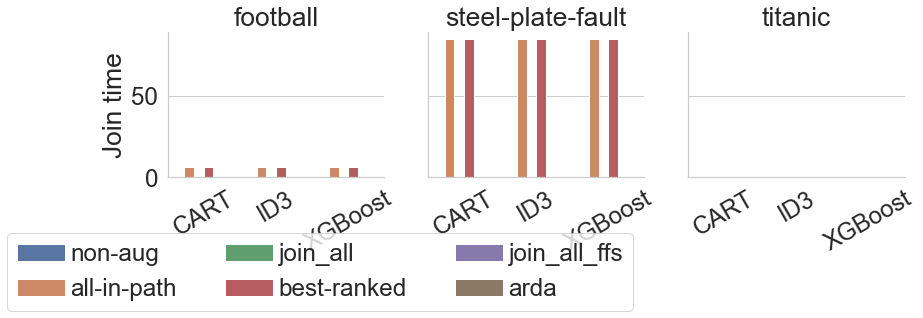

In [17]:



# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

### SMALL DATASETS JOIN TIME

join_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
# join_time.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)
join_time_filtered = join_time[join_time['dataset'].isin(small_datasets)]

display(join_time)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="join_time", hue="approach", col="dataset", data=join_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Join time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(-0.2, -1), loc=4, ncol=3, handletextpad=0.2)

g.savefig('plots/join-time-all.pdf', dpi=300, bbox_inches="tight")




In [18]:
train_time = None
for approach in df['approach'].unique():
    dff = df[df['approach']==approach]
#     dff = dataframe[(dataframe['dataset']!='PubMed_Diabetes') & (dataframe['dataset']!='CiteSeer') & (dataframe['dataset']!='CORA')]
    dff = dff.groupby(['dataset', 'algorithm', 'approach'])['train_time'].max().to_frame(name='train_time').reset_index()
    if train_time is None:
        train_time = dff
    else:
        train_time = pd.concat([train_time, dff])

,dataset,algorithm,approach,train_time
0,football,CART,arda,-2.721879+0.000000j
3,steel-plate-fault,CART,arda,-2.811296+0.000000j
6,titanic,CART,best-ranked,-2.589174+0.000000j
6,titanic,CART,arda,-2.680222+0.000000j
3,steel-plate-fault,CART,best-ranked,-2.155470+0.000000j
0,football,CART,best-ranked,-2.727676+0.000000j
4,steel-plate-fault,ID3,arda,0.291886+0.000000j
7,titanic,ID3,arda,-1.435784+0.000000j
1,football,ID3,arda,3.695920+0.000000j
1,football,ID3,best-ranked,5.103035+0.000000j


/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


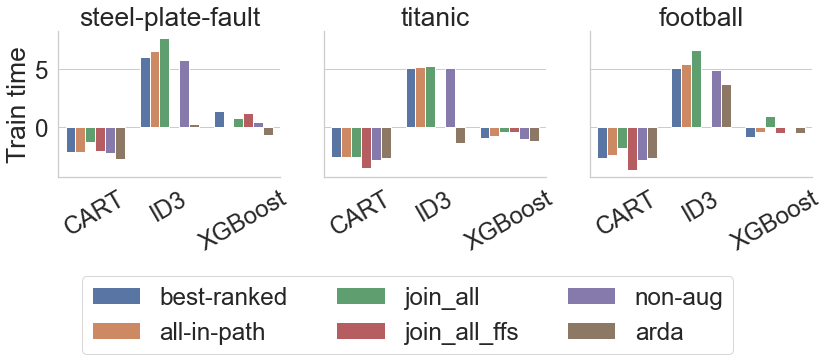

In [20]:
# Accuracy of BestRank, JoinAll and Non-Aug
from cmath import log

# display(train_time)

#### TRAIN TIME small datasets
label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2, 'join_all_ffs': 3, 'non-aug': 4, 'arda': 5}

train_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
train_time_filtered = train_time[train_time['dataset'].isin(small_datasets)]
train_time_filtered['train_time'] = train_time_filtered.apply(lambda row: log(row['train_time']), axis=1)
display(train_time_filtered[(train_time_filtered['approach'] == 'best-ranked') | (train_time_filtered['approach'] == 'arda')])
train_time_filtered.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="train_time", hue="approach", col="dataset", data=train_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Train time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/train-time-all-small.pdf', dpi=300, bbox_inches="tight")

/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_36572/193570243.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_time_filtered['train_time'] = train_time_filtered.apply(lambda row: log(row['train_time']), axis=1)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to 

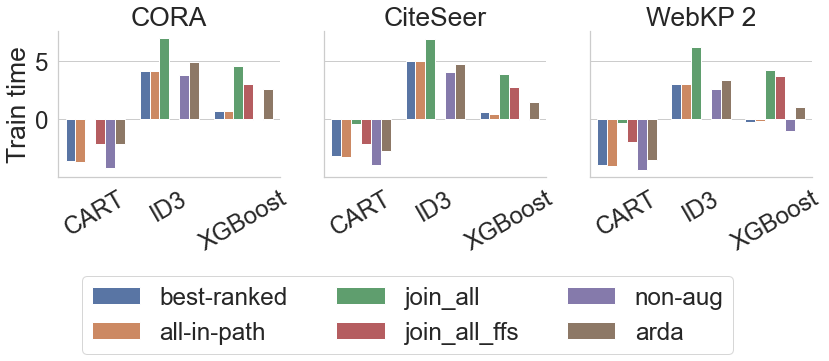

In [27]:
# Accuracy of BestRank, JoinAll and Non-Aug

from cmath import log
# display(train_time)

#### TRAIN TIME BIG datasets
train_time_filtered
train_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
train_time_filtered = train_time[train_time['dataset'].isin(big_datasets)]
# train_time_filtered = train_time_filtered[train_time_filtered['approach'] != 'join_all']
train_time_filtered['train_time'] = train_time_filtered.apply(lambda row: log(row['train_time']), axis=1)
train_time_filtered.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="train_time", hue="approach", col="dataset", data=train_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Train time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/train-time-all-big.pdf', dpi=300, bbox_inches="tight")

,dataset,algorithm,approach,depth
0,football,CART,arda,6.0
3,steel-plate-fault,CART,all-in-path,6.0
4,titanic,CART,join_all_ffs,2.0
2,steel-plate-fault,CART,join_all_ffs,13.0
6,titanic,CART,all-in-path,5.0


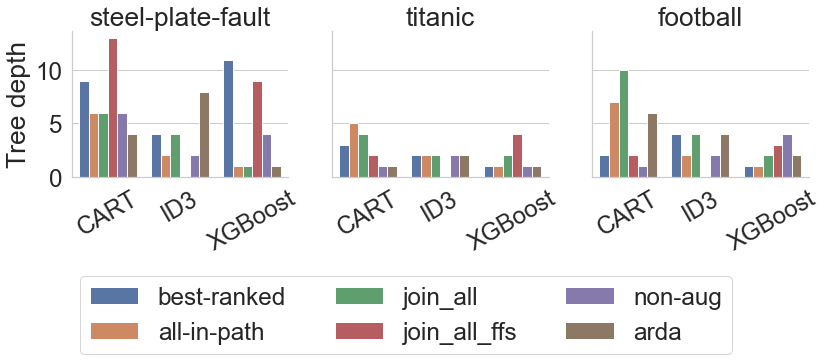

In [17]:

display(depth.head())

# DEPTH SMALL labels
# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

depth.sort_values(by=['algorithm'], ascending=True, inplace=True)
depth_filtered = depth[depth["dataset"].isin(small_datasets)]
depth_filtered.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="depth", hue="approach", col="dataset", data=depth_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Tree depth')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/depth-all-small.png', dpi=300, bbox_inches="tight")





In [16]:
display(depth.head())

# DEPTH BIG labels
# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

depth.sort_values(by=['algorithm'], ascending=True, inplace=True)
depth_filtered = depth[depth["dataset"].isin(big_datasets)]
depth_filtered.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="depth", hue="approach", col="dataset", data=depth_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Tree depth')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/depth-all-big.pdf', dpi=300, bbox_inches="tight")


,dataset,algorithm,approach,depth
0,football,CART,arda,6.0
0,football,CART,all-in-path,7.0
0,football,CART,join_all,10.0
6,titanic,CART,non-aug,1.0
3,steel-plate-fault,CART,arda,4.0


/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


ValueError: min() arg is an empty sequence

/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


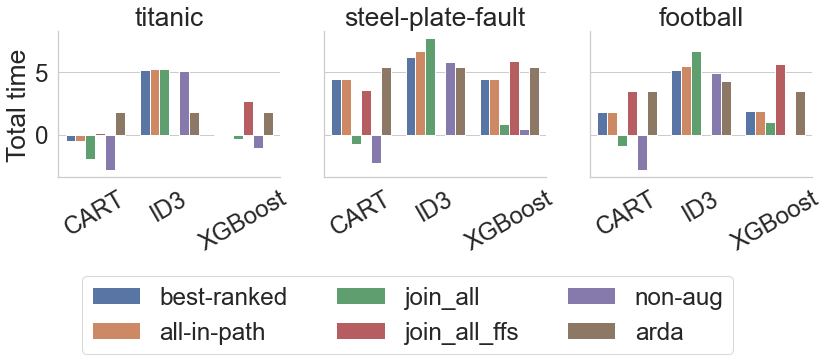

In [15]:
# Accuracy of BestRank, JoinAll and Non-Aug

from cmath import log
# display(train_time)

#### TOTAL TIME SMALL datasets
# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

total_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
total_time_filtered = total_time[total_time['dataset'].isin(small_datasets)]
# total_time_filtered = total_time_filtered[total_time_filtered['approach'] != 'join_all']
total_time_filtered['total_time'] = total_time_filtered.apply(lambda row: log(row['total_time']), axis=1)
total_time_filtered.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="total_time", hue="approach", col="dataset", data=total_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Total time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/total-time-all-small.png', dpi=300, bbox_inches="tight")

/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_36572/1755753810.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_time_filtered['total_time'] = total_time_filtered.apply(lambda row: log(row['total_time']), axis=1)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to

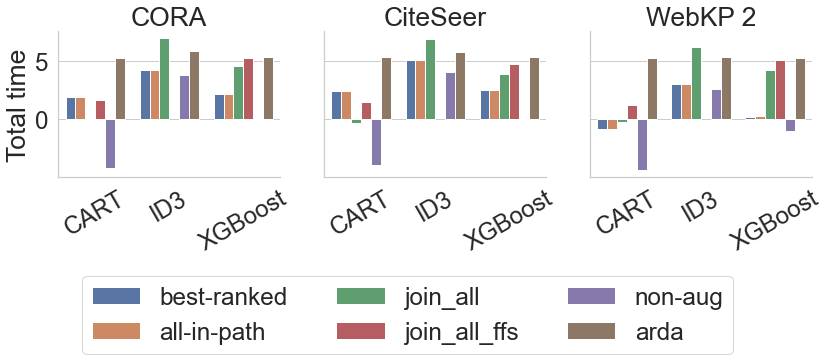

In [31]:
from cmath import log
# display(train_time)

#### TOTAL TIME BIG datasets
# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

total_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
total_time_filtered = total_time[total_time['dataset'].isin(big_datasets)]
# total_time_filtered = total_time_filtered[total_time_filtered['approach'] != 'join_all']
total_time_filtered['total_time'] = total_time_filtered.apply(lambda row: log(row['total_time']), axis=1)
total_time_filtered.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="total_time", hue="approach", col="dataset", data=total_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Total time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)


g.savefig('plots/total-time-all-big.pdf', dpi=300, bbox_inches="tight")